In [1]:
# A notebook for an exploration on the predictors for logistic and linear regression
# As well as an exploration into more feature engineering.

In [57]:
# Since video is on top level
import sys
sys.path.append("../")

In [58]:
import numpy as np
import os
import pandas as pd
from video_utils import CatVideo
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
import cpbd
from scipy import ndimage
import statsmodels.api as sm

import seaborn as sn
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12
from PIL import Image

In [40]:
!pip install statsmodels

     |████████████████████████████████| 8.4 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 18.4 MB/s eta 0:00:01


In [59]:
x_headers = [
    "eye_ratio", "head_size", "ear_ratio", 
    "conf_head", "conf_eye_0", "conf_eye_1", 
    "conf_ear_0", "conf_ear_1", "conf_nose", "sharpness", "head_location"
]

In [60]:
"""
Load up predictors and display them.
"""

predictors = np.loadtxt("../data/regression_training/features_v2.txt")
predictors_df = pd.DataFrame(predictors, columns=x_headers)
display(predictors_df)

,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_eye_1,conf_ear_0,conf_ear_1,conf_nose,sharpness,head_location
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,0.285022,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.894592,0.000000,0.806655,0.000000,0.578450,0.000000,1.000000
5,0.874559,0.086370,0.510148,0.926741,0.938150,0.887530,0.984550,0.749880,0.921693,0.402862,0.161359
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7,0.505956,0.375955,0.000000,0.708893,0.890296,0.560150,0.000000,0.000000,0.000000,0.087710,0.217187
8,0.926471,0.071832,0.000000,0.839750,0.535549,0.514691,0.784741,0.000000,0.957674,0.382975,0.344165
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [61]:
# Each item in X-headers is just a labeled image in the a random video
# A frame where none of the items are 0, no cat is detected.

In [63]:
frames_df = pd.read_csv("../data/regression_training/score_v2.csv", names=["labeler", "video", "frame_seconds", "score"])

# Grab all frames where there's a cat
frames_df = frames_df[frames_df["score"] > 0].reset_index()
# display(frames_df)

# Now create a DF concating the predictors, and score + frame_metadata
data_df = pd.concat([predictors_df, frames_df], axis=1)

headers_to_sum = x_headers[:-1]

# Sum all columns for a given row, and if anything is greater than 0, use the row
data_df["sum"] = data_df[headers_to_sum].sum(axis=1)
data_df = data_df[data_df["sum"] > 0].reset_index()
display(data_df)

,level_0,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_eye_1,conf_ear_0,conf_ear_1,conf_nose,sharpness,head_location,index,labeler,video,frame_seconds,score,sum
0,1,0.000000,0.000000,0.000000,0.000000,0.285022,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,all,cat74.mp4,13.984110,3,0.285022
1,4,0.000000,0.000000,0.000000,0.000000,0.894592,0.000000,0.806655,0.000000,0.578450,0.000000,1.000000,4,all,cat65.mp4,1.214871,4,2.279698
2,5,0.874559,0.086370,0.510148,0.926741,0.938150,0.887530,0.984550,0.749880,0.921693,0.402862,0.161359,5,all,cat50.mp4,10.887835,5,7.282483
3,7,0.505956,0.375955,0.000000,0.708893,0.890296,0.560150,0.000000,0.000000,0.000000,0.087710,0.217187,8,all,cat70.mp4,0.742923,2,3.128959
4,8,0.926471,0.071832,0.000000,0.839750,0.535549,0.514691,0.784741,0.000000,0.957674,0.382975,0.344165,9,all,cat59.mp4,25.081704,5,5.013683
5,11,0.000000,0.067433,0.725797,0.513384,0.951640,0.000000,0.637270,0.475906,0.827745,0.495320,0.265477,12,all,cat52.mp4,25.302225,5,4.694497
6,12,0.000000,0.038079,0.527755,0.678316,0.786317,0.000000,0.855984,0.301240,0.654584,0.747660,0.089452,15,all,cat32.mp4,16.872556,4,4.589935
7,13,0.755652,0.076198,0.720319,0.879773,0.868799,0.739943,0.660927,0.625598,0.951834,0.654815,0.049539,16,all,cat34.mp4,9.489389,4,6.933858
8,15,0.698864,0.030707,0.944842,0.969847,0.770326,0.407627,0.931401,0.859105,0.744510,0.664398,0.175626,18,all,cat23.mp4,6.145226,4,7.021627
9,16,0.707527,0.091976,0.887624,0.939281,0.962950,0.951959,0.985550,0.859405,0.970418,0.413880,0.247265,19,all,cat56.mp4,11.031815,5,7.770570


In [19]:
"""
Notes on the predictors

Conf_eye_0 is the maximum confidence amongst all eyes detected
Conf_eye_1 is the second-greatest confidence amongst all eyes detected
Conf_ear_0 is maximum confidence amongst all ears detected
Conf_ear_1 second greatest confidence
Conf_nose = maximum confidence in nose detected
eye_ratio is the ratio between size of eyes
head_size is the relative size of the head; bounding box of head divided by frame
sharpness is still using the Variance of the Laplacian

Create another feature: two eyes detected; in the final predictor set, use the highest eye confidence.
"""

'\nNotes on the predictors\n\nConf_eye_0 is the maximum confidence amongst all eyes detected\nConf_eye_1 is the second-greatest confidence amongst all eyes detected\nConf_ear_0 is maximum confidence amongst all ears detected\nConf_ear_1 second greatest confidence\nConf_nose = maximum confidence in nose detected\neye_ratio is the ratio between size of eyes\nhead_size is the relative size of the head; bounding box of head divided by frame\nsharpness is still using the Variance of the Laplacian\n\nCreate another feature: two eyes detected; in the final predictor set, use the highest eye confidence.\n'

In [20]:
# Here are Andrew's initial coefficients, mapping to the order of what is returned in the function in process_video.py
# model_params_lin = np.load("../data/lin_params_v0.npy")

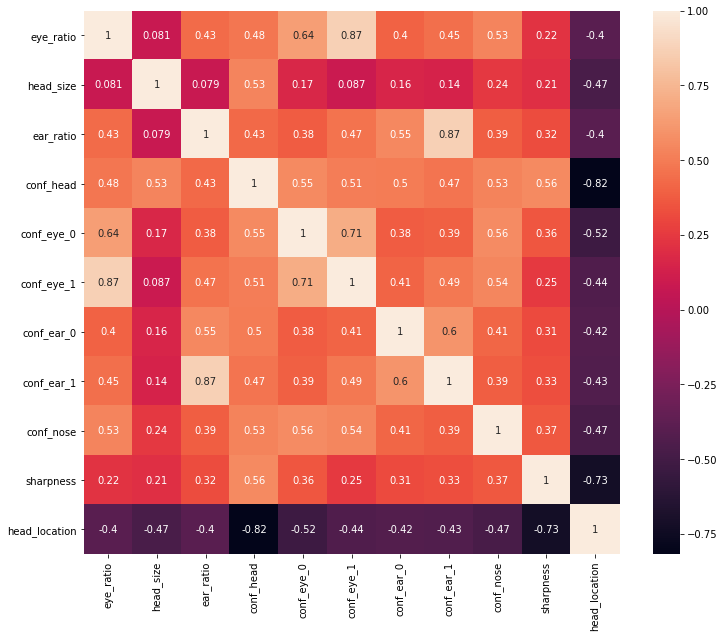

In [64]:
corrMatrix = data_df[x_headers].corr()
plt.figure(figsize=(12, 10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [65]:
# This correlation matrix tells us that we need to throw out one of the eyes
data_df.drop(columns=["conf_eye_1", "conf_ear_1"])

,level_0,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_ear_0,conf_nose,sharpness,head_location,index,labeler,video,frame_seconds,score,sum
0,1,0.000000,0.000000,0.000000,0.000000,0.285022,0.000000,0.000000,0.000000,1.000000,1,all,cat74.mp4,13.984110,3,0.285022
1,4,0.000000,0.000000,0.000000,0.000000,0.894592,0.806655,0.578450,0.000000,1.000000,4,all,cat65.mp4,1.214871,4,2.279698
2,5,0.874559,0.086370,0.510148,0.926741,0.938150,0.984550,0.921693,0.402862,0.161359,5,all,cat50.mp4,10.887835,5,7.282483
3,7,0.505956,0.375955,0.000000,0.708893,0.890296,0.000000,0.000000,0.087710,0.217187,8,all,cat70.mp4,0.742923,2,3.128959
4,8,0.926471,0.071832,0.000000,0.839750,0.535549,0.784741,0.957674,0.382975,0.344165,9,all,cat59.mp4,25.081704,5,5.013683
5,11,0.000000,0.067433,0.725797,0.513384,0.951640,0.637270,0.827745,0.495320,0.265477,12,all,cat52.mp4,25.302225,5,4.694497
6,12,0.000000,0.038079,0.527755,0.678316,0.786317,0.855984,0.654584,0.747660,0.089452,15,all,cat32.mp4,16.872556,4,4.589935
7,13,0.755652,0.076198,0.720319,0.879773,0.868799,0.660927,0.951834,0.654815,0.049539,16,all,cat34.mp4,9.489389,4,6.933858
8,15,0.698864,0.030707,0.944842,0.969847,0.770326,0.931401,0.744510,0.664398,0.175626,18,all,cat23.mp4,6.145226,4,7.021627
9,16,0.707527,0.091976,0.887624,0.939281,0.962950,0.985550,0.970418,0.413880,0.247265,19,all,cat56.mp4,11.031815,5,7.770570


In [67]:
train_indices = range(260)
test_indices = range(260, 301)
X_train = data_df.iloc[train_indices][x_headers]
y_train = data_df.iloc[train_indices]["score"]

X_test = data_df.iloc[test_indices][x_headers]
y_test = data_df.iloc[test_indices]["score"]

In [68]:
 
model_logistic = LogisticRegression(penalty="l1")
model_logistic.fit(X_train, y_train)
results = model_logistic.predict(X_test)
# Accuracy score 
accuracy_score(y_test, results)

/Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.43902439024390244

In [69]:
print(list(results), "Predicted")
print(list(y_test), "Actual")

results_probability = model_logistic.predict_proba(X_test)

[3, 4, 5, 3, 4, 4, 4, 4, 4, 5, 4, 3, 4, 3, 5, 4, 5, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 3, 4, 4, 5, 4, 4, 3, 3, 3, 4, 3, 5] Predicted
[3, 5, 5, 4, 3, 4, 3, 5, 3, 5, 5, 2, 4, 2, 5, 5, 5, 2, 4, 3, 4, 5, 2, 4, 3, 4, 3, 5, 5, 4, 4, 4, 5, 5, 4, 2, 3, 2, 4, 4, 5] Actual


In [18]:
"""
Things left to do
"""

"""
1. Look through the 5s, see waht other features you think would make it look good
2. Systematically test all our features and look at how it changes the test accuracy - Emily TODO (start)
3. Color brightness / saturation - Emily TODO (today?)
4. Detect cat and check where it is on the frame?
5. Relative size of cat according to segmentation: ratio of cat to non-cat - Emily TODO (today?)
"""

'\n1. Look through the 5s, see waht other features you think would make it look good\n2. Systematically test all our features and look at how it changes the test accuracy - Emily TODO (start)\n3. Color brightness / saturation - Emily TODO (today?)\n4. Detect cat and check where it is on the frame?\n5. Relative size of cat according to segmentation: ratio of cat to non-cat - Emily TODO (today?)\n\n'

In [31]:
# Add a column to store the image data.
all_df["image"] = None

for i, frame in all_df.iterrows():
    video_name = frame["video"].split(".mp4")[0]
    all_df["image"][i] = np.array(Image.open(f"frames/{i}_{video_name}.png"))


FileNotFoundError: [Errno 2] No such file or directory: 'frames/0_cat74.png'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              78.09
Date:                Tue, 05 May 2020   Prob (F-statistic):                    6.01e-31
Time:                        16:34:37   Log-Likelihood:                         -87.641
No. Observations:                  70   AIC:                                      197.3
Df Residuals:                      59   BIC:                                      222.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
eye_ratio         0.2237      0.632      0.354      0.725      -1.041       1.488
head_size        -2.5786      1.872     -1.378      0.174      -6.324       1.167
ear_ratio         0.3608      0.574      0.628      0.532      -0.788       1.510
conf_head         0.0269      0.711      0.038      0.970      -1.396       1.450
conf_eye_0        2.4147      0.510      4.736      0.000       1.394       3.435
conf_eye_1        0.0715      0.709      0.101      0.920      -1.348       1.491
conf_ear_0        0.9311      0.519      1.796      0.078      -0.106       1.969
conf_ear_1       -0.2687      0.787     -0.342      0.734      -1.843       1.306
conf_nose         1.4004      0.361      3.879      0.000       0.678       2.123
sharpness        -0.3257      0.543     -0.600      0.551      -1.412       0.761
head_location     0.7307      0.330      2.215      0.031       0.071       1.391
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                3.257
Skew:                           0.498   Prob(JB):                        0.196
Kurtosis:                       3.350   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Actual')

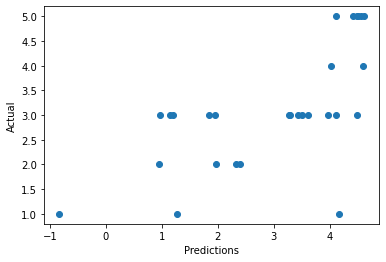

In [48]:
linear_model = sm.OLS(y_train, X_train).fit()
display(linear_model.summary())

# linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

plt.scatter(predictions, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [53]:
for feature in x_headers:
    linear_model = sm.OLS(y_train, X_train[feature]).fit()
    print(feature)
    print(linear_model.conf_int())
    print("_____")

eye_ratio
                  0         1
eye_ratio  4.226915  5.863951
_____
head_size
                  0          1
head_size  8.069549  19.888846
_____
ear_ratio
                  0         1
ear_ratio  3.868209  5.619462
_____
conf_head
                  0         1
conf_head  3.538984  4.875739
_____
conf_eye_0
                   0         1
conf_eye_0  3.850178  4.615469
_____
conf_eye_1
                  0         1
conf_eye_1  4.18429  5.812454
_____
conf_ear_0
                   0         1
conf_ear_0  3.867645  4.954378
_____
conf_ear_1
                   0         1
conf_ear_1  4.654193  6.780081
_____
conf_nose
                  0        1
conf_nose  4.145216  5.51205
_____
sharpness
                  0         1
sharpness  4.267023  6.424152
_____
head_location
                      0         1
head_location  2.634898  5.016877
_____


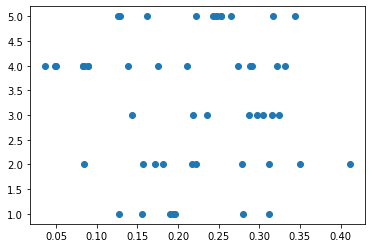

In [56]:

plt.scatter(X_train["head_location"][X_train["head_location"] < 1], y_train[X_train["head_location"] < 1])

NameError: name 'out_reshaped' is not defined

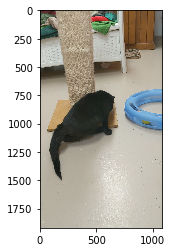

In [43]:
"""
ADDING CAT DETECTED PIXEL TO BACKGROUND RATIO
"""
CAT_CLASS = 8

model = pspnet_101_voc12()

for i, frame in frames_cnn.iterrows():
    image = frame["image"]
    plt.imshow(image)
    video_name = frame["video"].split(".mp4")[0]
    out = model.predict_segmentation(
        inp=image,
        out_fname=f"test_output/segmentation_test_{i}_{video_name}.png"
    )
#     cat_pixels = np.where(out_reshaped == 8)
    # This is the detected cat
    plt.imshow(out)
    import sys; sys.exit()

In [65]:
cat_detected_pixels = len(out == 8)
total = out.shape[0] * out.shape[1]
# print(cat_detected_pixels/total)

In [66]:
len(percentage) / 

SyntaxError: invalid syntax (<ipython-input-66-2935d4e71cfc>, line 1)

In [67]:
cv2.resize(out, (image.shape[1], image.shape[0]))

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3923: error: (-215:Assertion failed) func != 0 in function 'resize'
